                Price  Volume
DateTime                     
2014-01-01  37.454012     608
2014-01-02  95.071431     498
2014-01-03  73.199394     733
2014-01-04  59.865848     238
2014-01-05  15.601864      94
...               ...     ...
2023-12-25  15.449220     326
2023-12-26  48.726535     893
2023-12-27  42.998521     919
2023-12-28  59.691069      91
2023-12-29  99.955770     750

[3650 rows x 2 columns]


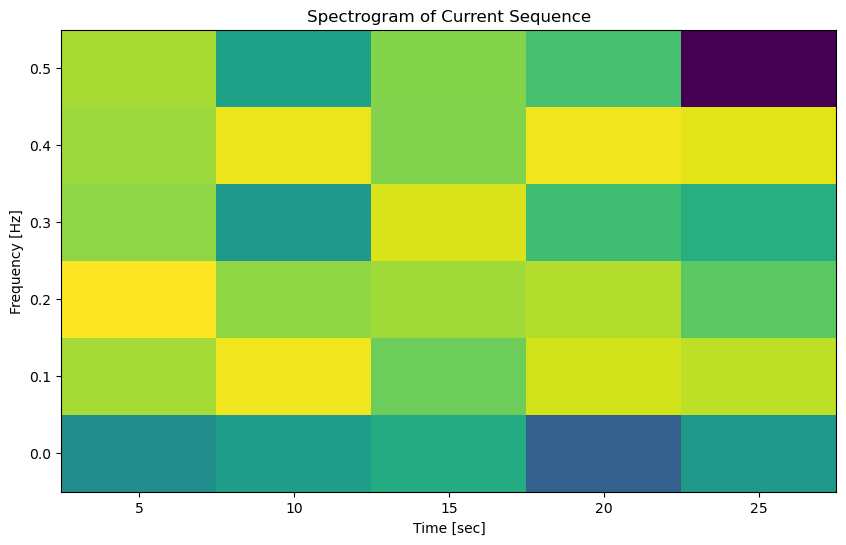

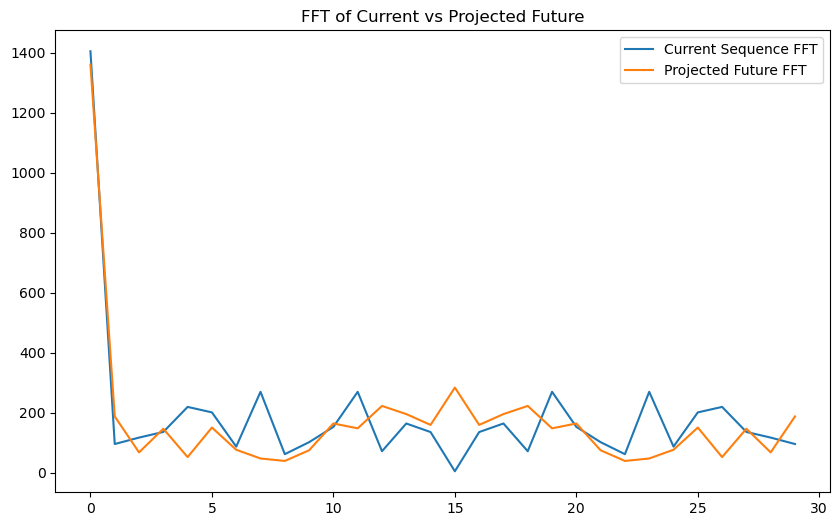

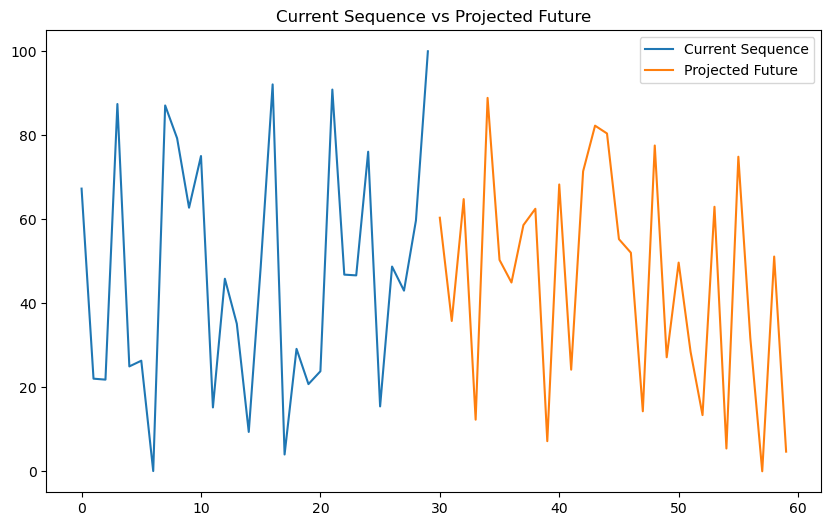

Projected Future Price Movement:
[6.03493096e+01 3.57814084e+01 6.47817446e+01 1.22920678e+01
 8.88659080e+01 5.03083951e+01 4.49349742e+01 5.85864788e+01
 6.24783863e+01 7.17758062e+00 6.82617221e+01 2.41931680e+01
 7.13952633e+01 8.22534794e+01 8.03958508e+01 5.52500967e+01
 5.20169892e+01 1.42875961e+01 7.75346150e+01 2.71409380e+01
 4.96695423e+01 2.84274093e+01 1.33828363e+01 6.29557697e+01
 5.43320348e+00 7.48645234e+01 3.17586795e+01 1.34693004e-02
 5.11129139e+01 4.68519085e+00]
The projected movement indicates a potential loss.


In [4]:
!pip install dtaidistance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtaidistance import dtw
from scipy.signal import spectrogram
from scipy.fftpack import fft

# Sample generation for demonstration (10 years daily data simulation)
np.random.seed(42)
n_days = 365 * 10
date_range = pd.date_range(start='2014-01-01', periods=n_days, freq='D')
data = pd.DataFrame({
    'DateTime': date_range,
    'Price': np.random.random(n_days) * 100,
    'Volume': np.random.randint(1, 1000, n_days)
})
data.set_index('DateTime', inplace=True)

print(data)



In [7]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame with 'Price' and 'Volume' columns
# Example of adding SMA, RSI, Bollinger Bands, etc.
data['SMA_10'] = data['Price'].rolling(window=10).mean()
data['EMA_10'] = data['Price'].ewm(span=10, adjust=False).mean()

delta = data['Price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

data['Middle_Band'] = data['Price'].rolling(window=20).mean()
data['Upper_Band'] = data['Middle_Band'] + 2 * data['Price'].rolling(window=20).std()
data['Lower_Band'] = data['Middle_Band'] - 2 * data['Price'].rolling(window=20).std()

# Add other indicators similarly...

# Drop NA values after feature engineering
data.dropna(inplace=True)


                Price  Volume     SMA_10     EMA_10        RSI  Middle_Band  \
DateTime                                                                      
2014-02-08  68.423303      98  46.990048  49.240996  52.147618    44.738280   
2014-02-09  44.015249     720  50.927069  48.290860  46.699589    45.482896   
2014-02-10  12.203823     265  46.072003  41.729581  49.217319    43.033823   
2014-02-11  49.517691     800  49.318531  43.145601  49.810115    44.812238   
2014-02-12   3.438852     783  49.011900  35.926192  44.833834    43.523458   

            Upper_Band  Lower_Band  
DateTime                            
2014-02-08  103.432132  -13.955573  
2014-02-09  103.718703  -12.752910  
2014-02-10  102.593905  -16.526259  
2014-02-11  102.819582  -13.195106  
2014-02-12  104.079294  -17.032379  


In [8]:
data

,Price,Volume,SMA_10,EMA_10,RSI,Middle_Band,Upper_Band,Lower_Band
DateTime,,,,,,,,
2014-02-08,68.423303,98,46.990048,49.240996,52.147618,44.738280,103.432132,-13.955573
2014-02-09,44.015249,720,50.927069,48.290860,46.699589,45.482896,103.718703,-12.752910
2014-02-10,12.203823,265,46.072003,41.729581,49.217319,43.033823,102.593905,-16.526259
2014-02-11,49.517691,800,49.318531,43.145601,49.810115,44.812238,102.819582,-13.195106
2014-02-12,3.438852,783,49.011900,35.926192,44.833834,43.523458,104.079294,-17.032379
...,...,...,...,...,...,...,...,...
2023-12-25,15.449220,326,44.558181,44.314406,50.025684,45.194143,106.022892,-15.634606
2023-12-26,48.726535,893,40.223438,45.116611,50.302506,47.627203,104.627891,-9.373485
2023-12-27,42.998521,919,44.122699,44.731504,50.831943,45.423784,99.328097,-8.480530


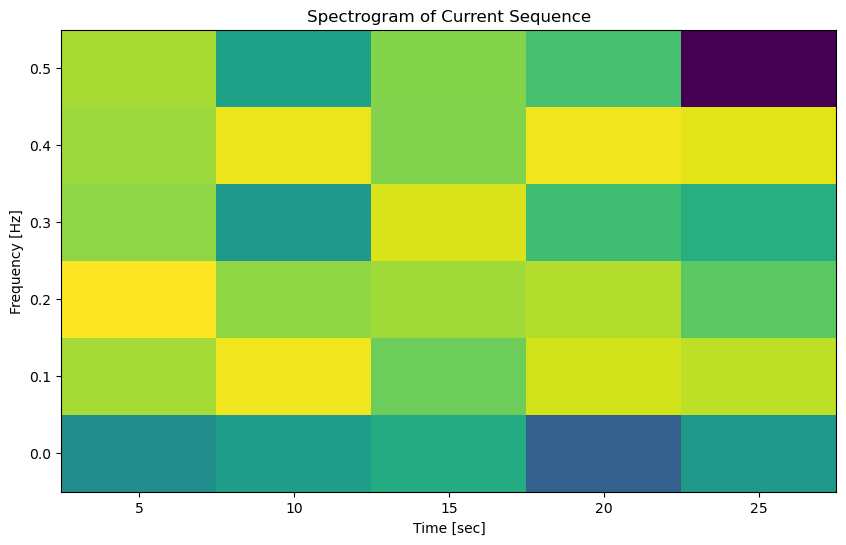

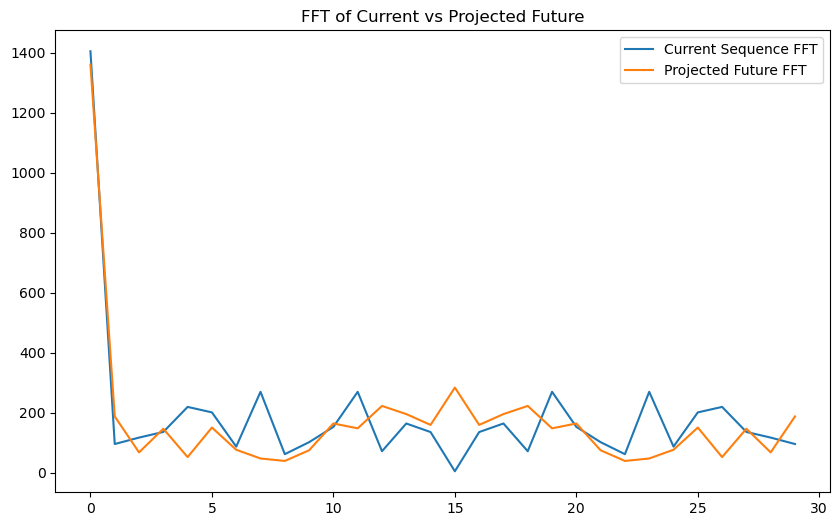

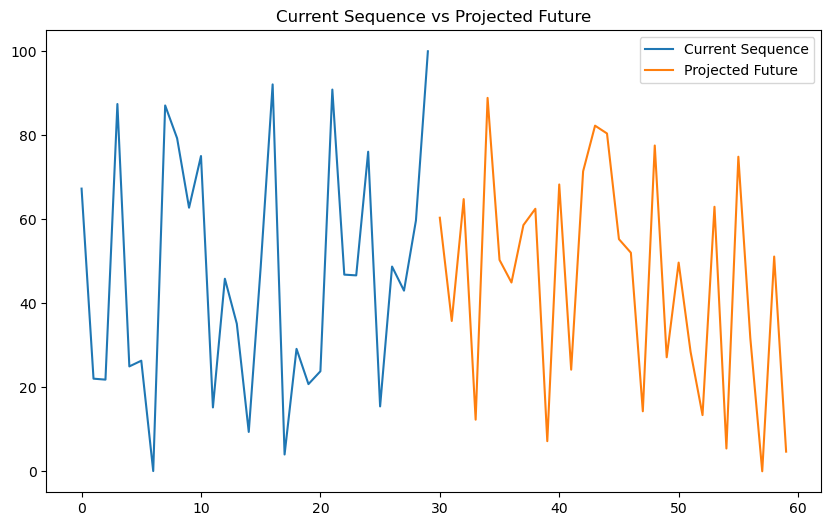

Projected Future Price Movement:
[6.03493096e+01 3.57814084e+01 6.47817446e+01 1.22920678e+01
 8.88659080e+01 5.03083951e+01 4.49349742e+01 5.85864788e+01
 6.24783863e+01 7.17758062e+00 6.82617221e+01 2.41931680e+01
 7.13952633e+01 8.22534794e+01 8.03958508e+01 5.52500967e+01
 5.20169892e+01 1.42875961e+01 7.75346150e+01 2.71409380e+01
 4.96695423e+01 2.84274093e+01 1.33828363e+01 6.29557697e+01
 5.43320348e+00 7.48645234e+01 3.17586795e+01 1.34693004e-02
 5.11129139e+01 4.68519085e+00]
The projected movement indicates a potential loss.


In [9]:
# **Dynamic Time Warping (DTW) Pattern Matching**
def pattern_matching_dtw(current_sequence, historical_data):
    min_distance = float('inf')
    best_match_index = -1

    # Ensure current_sequence is a 1-D array
    current_sequence = np.asarray(current_sequence).flatten()

    for i in range(len(historical_data) - len(current_sequence)):
        candidate_sequence = historical_data[i:i + len(current_sequence)]
        candidate_sequence = np.asarray(candidate_sequence).flatten()  # Ensure 1-D

        # Use dtw.distance to compute DTW distance
        distance = dtw.distance(current_sequence, candidate_sequence)
        if distance < min_distance:
            min_distance = distance
            best_match_index = i

    return best_match_index, min_distance

# **Spectrogram Analysis**
def compute_spectrogram(data, nperseg=10, noverlap=5):
    # Ensure noverlap is less than nperseg
    if noverlap >= nperseg:
        raise ValueError("noverlap must be less than nperseg.")
    f, t, Sxx = spectrogram(data, nperseg=nperseg, noverlap=noverlap)
    return f, t, Sxx


# **Wavelength Patterns**
def compute_fft(data):
    return np.abs(fft(data))

# **Prediction Based on Pattern Matching**
def predict_future_price(current_sequence, historical_data):
    # Ensure the input sequences are 1-D
    current_sequence = np.asarray(current_sequence).flatten()
    historical_data = np.asarray(historical_data).flatten()

    # Pattern Matching with DTW
    best_match_index, min_distance = pattern_matching_dtw(current_sequence, historical_data)
    
    # Extract best matched segment and next steps
    matched_segment = historical_data[best_match_index:best_match_index + len(current_sequence)]
    projected_future = historical_data[best_match_index + len(current_sequence):best_match_index + len(current_sequence) + len(current_sequence)]
    
    # Spectrogram Analysis
    f, t, Sxx = compute_spectrogram(current_sequence)
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Spectrogram of Current Sequence')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    # Wavelength Patterns
    fft_current = compute_fft(current_sequence)
    fft_projected = compute_fft(projected_future)
    
    # Plot FFT results
    plt.figure(figsize=(10, 6))
    plt.plot(fft_current, label='Current Sequence FFT')
    plt.plot(fft_projected, label='Projected Future FFT')
    plt.legend()
    plt.title('FFT of Current vs Projected Future')
    plt.show()
    
    # Predict profit or loss based on trend comparison
    profit_loss_indicator = np.mean(projected_future) > np.mean(current_sequence)
    
    return projected_future, profit_loss_indicator

# **Applying the Functions**
# Define the length of the sequence you want to match (e.g., 30 days)
sequence_length = 30
current_sequence = data['Price'].values[-sequence_length:]
historical_data = data['Price'].values[:-sequence_length]

# Predict future price movement
projected_future, profit_loss_indicator = predict_future_price(current_sequence, historical_data)

# **Visualize the Results**
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(current_sequence)), current_sequence, label='Current Sequence')
plt.plot(np.arange(len(current_sequence), len(current_sequence) + len(projected_future)), projected_future, label='Projected Future')
plt.legend()
plt.title('Current Sequence vs Projected Future')
plt.show()

print("Projected Future Price Movement:")
print(projected_future)

if profit_loss_indicator:
    print("The projected movement indicates a potential profit.")
else:
    print("The projected movement indicates a potential loss.")
